# **Punto 2**
Usando lo visto en clase y las condiciones KKT, escriba el problema dual de SVM para el caso
no separable más general (con variables de holgura y función transformadora φ). Con la función
`quadprog` de Matlab (o su equivalente en Python o cualquier otro lenguaje de su escogencia) y un
código para la función de generalización de su autoría, resuelva el problema con la base de datos flor
de iris (https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) para clasificar las clases de
plantas Iris-Setosa e Iris-Virgínica. Use varios valores de C y diferentes tipos de kernels. Determine
el error de su clasificación en cada caso y obtenga conclusiones.

## Caso no Separable
Antes de empezar a desarrollar cada iten de esta parte 2 entenderemos lo que son los casos no separble. Se entiende como caso no seprable cuando no existe un clasificador lineal que pueda clasificar correctamente todos los puntos por ende algunos errores de clasificación pueden ocurrir. Existen tres tipos de puntos mal clasificados.

### 1. Puntos en la frontera o fuera del margen en el lado correcto del clasificador:
- es decir cuando: $$ y_n f(\mathbf{x}_n) \geq 1  $$

- Estos puntos se encuentran en la frontera del margen de decisión o en el lado correcto, pero potencialmente fuera del margen. No cometen errores de clasificación.
- Variables de holgura: $ \xi_n = 0 $ ya que estos puntos no requieren ninguna holgura para ser clasificados correctamente.

### 2. Puntos en el lado correcto del clasificador, pero dentro del margen:
- Cuando: $$ 0 < y_n f(\mathbf{x}_n) < 1 $$
- Estos puntos están correctamente clasificados pero se encuentran dentro del margen. Cometen un error de margen.
- Variables de holgura: $ 0 < \xi_n < 1 $. El valor de $ \xi_n $ mide el grado de violación del margen por parte del punto correspondiente.

Las variables de holgura $ \xi_n $ son fundamentales en la formulación del problema de optimización de SVM. Permiten que el modelo tolere ciertas violaciones del margen, siendo reguladas por el parámetro de penalización $ C $, y forman parte del objetivo de minimización en la función de coste de SVM.

### 3. Puntos que se encuentran en el lugar equivocado del clasificador:
- Cuando: $y_n f(\mathbf{x}_n) \leq 0$
- Estos puntos están mal clasificados y se encuentran en el lado incorrecto del hiperplano de decisión.
- Variables de holgura: $\xi_n \geq 1$. Estos valores indican una violación considerable del margen, ya que no solo están dentro del margen, sino que están completamente en el lado equivocado.

### Graficamente:
![Descripción de la imagen](./imagen1.png)

- **Línea sólida**: Representa el hiperplano de decisión donde $f(\mathbf{x}) = 0$.
- **Líneas discontinuas**: Representan el margen del clasificador donde $f(\mathbf{x}) = 1$ y $f(\mathbf{x}) = -1$.
- **Símbolos**:
  - **Estrellas**: Puntos fuera o en los límites del margen y clasificados correctamente.
  - **Círculos**: Puntos dentro del margen, aún del lado correcto, pero cometiendo u

### Lagrangiano

Formulación del Lagrangiano: Es simplemente la suma de la función objetivo y las restricciones ponderadas por los multiplicadores de Lagrange.

Consideremos un problema de optimización de la siguiente forma:

- **Función Objetivo**: $f(x)$, que queremos maximizar o minimizar.
- **Restricciones**: $g_i(x) = 0$, donde $i$ varía de 1 a $m$, siendo $m$ el número total de restricciones de igualdad.

Para incorporar las restricciones dentro de la función objetivo, introducimos los multiplicadores de Lagrange $\lambda_i$ para cada restricción $g_i(x)$ y construimos la función Lagrangiana $\mathcal{L}$ como:

$$
\mathcal{L}(x, \lambda) = f(x) + \sum_{i=1}^{m} \lambda_i g_i(x)
$$

Aquí, $x$ representa el vector de variables de decisión y $\lambda$ el vector de multiplicadores de Lagrange.


### Aplicación en SVM

En el caso de las SVM, el Lagrangiano se utiliza para transformar el problema de optimización con restricciones (encontrar el hiperplano de separación máximo entre las clases) en uno que puede ser resuelto más eficientemente. Las restricciones de la SVM (por ejemplo, que los puntos de datos estén al menos a una distancia 1 del hiperplano de separación) se incorporan en la función Lagrangiana, y las condiciones de KKT se aplican para encontrar la solución óptima que maximiza el margen entre las clases.

El uso del Lagrangiano en este contexto es válido y poderoso porque permite convertir un problema de optimización con restricciones complicadas en uno más manejable, donde las restricciones están "empotradas" en la función objetivo. Esto facilita el uso de métodos de optimización para encontrar soluciones óptimas a problemas complejos como la clasificación en SVM.



### Aplicación a un Problema de Optimización

Para aplicar el Lagrangiano a un problema de optimización, seguimos los siguientes pasos:

1. **Formulación del Lagrangiano**: Combinamos la función objetivo y las restricciones en la función Lagrangiana.

2. **Encontrar las Condiciones de Estacionariedad**: Derivamos el Lagrangiano con respecto a todas las variables, incluyendo los multiplicadores de Lagrange, y buscamos los puntos donde estas derivadas se anulan. Esto nos da un sistema de ecuaciones para resolver.

3. **Verificar Condiciones (KKT)**: Para problemas con restricciones de desigualdad, necesitamos verificar las condiciones de Karush-Kuhn-Tucker, que incluyen la factibilidad primal y dual, la complementariedad y la condición de slack.

4. **Interpretación de los Multiplicadores de Lagrange**: Los valores de los multiplicadores de Lagrange en la solución óptima nos indican la sensibilidad de la función objetivo ante cambios marginales en las restricciones.

### Ejemplo en Optimización de SVM

En el contexto de Máquinas de Soporte Vectorial (SVM) para clasificación, buscamos maximizar el margen entre las dos clases sujetas a que todas las muestras estén correctamente clasificadas. El Lagrangiano para el problema de optimización de SVM con variables de holgura $\xi$ (para permitir clasificaciones erróneas) y una función de transformación $\phi$ (para mapear las muestras a un espacio donde sean linealmente separables) es:

$$
\mathcal{L}(w, b, \xi, \lambda, \mu) = \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \lambda_i [y_i (w^T \phi(x_i) + b) - 1 + \xi_i] - \sum_{i=1}^{n} \mu_i \xi_i
$$

Donde:
- $w$ es el vector de pesos del hiperplano.
- $b$ es el término de sesgo del hiperplano.
- $\xi$ es el vector de variables de holgura.
- $C$ es el parámetro de penalización para las variables de holgura.
- $\lambda$ y $\mu$ son los multiplicadores de Lagrange que aplican las restricciones del problema.

El uso de la función $\phi$ permite aplicar el truco del kernel en SVM, lo que facilita el cálculo de los productos internos en un espacio dimensional superior sin la necesidad de calcular la transformación explícitamente.

### De las Condiciones de Estacionariedad al Problema Dual

El Lagrangiano para un problema de SVM con términos de holgura ($\xi$) es:

$$ \mathcal{L}(w, b, \xi, \alpha, \mu) = \frac{1}{2}\|w\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \alpha_i [y_i (w \cdot x_i + b) - 1 + \xi_i] - \sum_{i=1}^{n} \mu_i \xi_i $$

Donde:
- $ w $ es el vector de pesos del hiperplano.
- $ b $ es el término de sesgo del hiperplano.
- $ \xi $ son las variables de holgura que permiten la violación del margen.
- $ C $ es el parámetro de penalización de las violaciones del margen.
- $ \alpha $ y $ \mu $ son los multiplicadores de Lagrange para las restricciones.

Para encontrar el máximo de este Lagrangiano respecto a $ w $ y $ b $, y minimizar respecto a $ \xi $, tomamos las derivadas parciales del Lagrangiano y las igualamos a cero:

1. Derivada respecto a $ w $: $ \nabla_w \mathcal{L} = w - \sum_{i=1}^{n} \alpha_i y_i x_i = 0 $ lo que nos da $ w = \sum_{i=1}^{n} \alpha_i y_i x_i $.
   
2. Derivada respecto a $ b $: $ \frac{\partial \mathcal{L}}{\partial b} = \sum_{i=1}^{n} \alpha_i y_i = 0 $.

3. Derivada respecto a $ \xi $: $ \frac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 $ lo que implica $ \alpha_i + \mu_i = C $, con $ \alpha_i, \mu_i \geq 0 $.

### Condiciones de Complementariedad

Las condiciones de complementariedad implican que para cada multiplicador de Lagrange $ \alpha_i $ y $ \mu_i $:

- $ \alpha_i [y_i (w^T x_i + b) - 1 + \xi_i] = 0 $
- $ \mu_i \xi_i = 0 $

Lo que significa que para un vector de soporte, $ \alpha_i > 0 $, y si $ \xi_i > 0 $, entonces $ \mu_i = 0 $ y viceversa.

### Condiciones de Holgura Primal y Dual

Las condiciones de holgura aseguran que:

- $ y_i(w^T x_i + b) \geq 1 - \xi_i $
- $ \xi_i \geq 0 $
- $ \alpha_i \geq 0 $
- $ \mu_i \geq 0 $

### Formulación del Problema Dual

Al sustituir $ w $ y $ \xi $ en el Lagrangiano con las relaciones obtenidas de las condiciones de estacionariedad y utilizar las condiciones de holgura y complementariedad, podemos reformular el problema como uno de maximización solo con respecto a los multiplicadores de Lagrange $ \alpha $:

Maximizar:

$$ W(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j x_i^T x_j $$

Sujeto a:

$$ 0 \leq \alpha_i \leq C $$
$$ \sum_{i=1}^{n} \alpha_i y_i = 0 $$

Esta es la formulación del problema dual de SVM. Resolver este problema proporciona los multiplicadores de Lagrange ($\alpha$), que a su vez se utilizan para encontrar $ w $ y $ b $ del hiperplano óptimo en el problema primal. Los multiplicadores de Lagrange que son mayores que cero corresponden a los vectores de soporte, que son los únicos datos que afectan la posición del hiperplano de separación. El problema dual es a menudo más fácil de resolver y es especialmente útil cuando se aplica el truco del kernel para datos que no son linealmente separables.


### Formulación del Problema Dual con la Función Transformadora $ \phi $

Al sustituir $ w $ y $ \xi $ en el Lagrangiano con las relaciones obtenidas de las condiciones de estacionariedad y utilizar las condiciones de holgura y complementariedad, podemos reformular el problema como uno de maximización solo con respecto a los multiplicadores de Lagrange $ \alpha $:

Maximizar:

$$ W(\alpha) = \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j) $$

donde $ K(x_i, x_j) $ es la función del kernel que representa el producto punto en el espacio transformado por $ \phi $, es decir, $ \phi(x_i)^T \phi(x_j) $. Esta sustitución es un ejemplo del "truco del kernel", que permite operar en un espacio de mayor dimensión sin necesidad de calcular explícitamente la transformación $ \phi $.

Sujeto a:

$$ 0 \leq \alpha_i \leq C $$
$$ \sum_{i=1}^{n} \alpha_i y_i = 0 $$

Los kernels comunes incluyen:

- **Lineal**: $ K(x_i, x_j) = x_i^T x_j $
- **Polinómico**: $ K(x_i, x_j) = (x_i^T x_j + c)^d $
- **RBF (Gaussiano)**: $ K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) $

Cada uno de estos kernels corresponde a una transformación $ \phi $ diferente y la elección del kernel y sus parámetros es crucial para la capacidad del modelo para ajustarse a los datos.


In [2]:
import plotly.express as px
from sklearn import datasets
import pandas as pd

# Cargamos el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convertimos a un DataFrame de Pandas
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Creamos un gráfico 3D interactivo
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species')

# Mostrar el gráfico
fig.show()

c:\Users\Edward Morales\miniconda3\envs\ml_venv\lib\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


Filtro los datos a los que necesito para el ejercicio, borramos las filas "setosa"

In [3]:
#renombro el df
column_names = df.columns.tolist()
print("Nombres de columnas de características:", column_names)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']

#filtro, quito versicolor
iris_df_filtered = df[df['class'] != 'setosa']
if 'setosa' in iris_df_filtered['class'].cat.categories:
    iris_df_filtered['class'] = iris_df_filtered['class'].cat.remove_categories(['setosa'])

#defino X & y
X = iris_df_filtered.drop(columns=['class'])
y = iris_df_filtered['class']


#Vemos sus caracteristicas
print(X.describe())
print(y.describe())
print(y.value_counts())

Nombres de columnas de características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
       sepal length  sepal width  petal length  petal width
count    100.000000   100.000000    100.000000   100.000000
mean       6.262000     2.872000      4.906000     1.676000
std        0.662834     0.332751      0.825578     0.424769
min        4.900000     2.000000      3.000000     1.000000
25%        5.800000     2.700000      4.375000     1.300000
50%        6.300000     2.900000      4.900000     1.600000
75%        6.700000     3.025000      5.525000     2.000000
max        7.900000     3.800000      6.900000     2.500000
count            100
unique             2
top       versicolor
freq              50
Name: class, dtype: object
class
versicolor    50
virginica     50
Name: count, dtype: int64


C:\Users\Edward Morales\AppData\Local\Temp\ipykernel_92220\1321155144.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

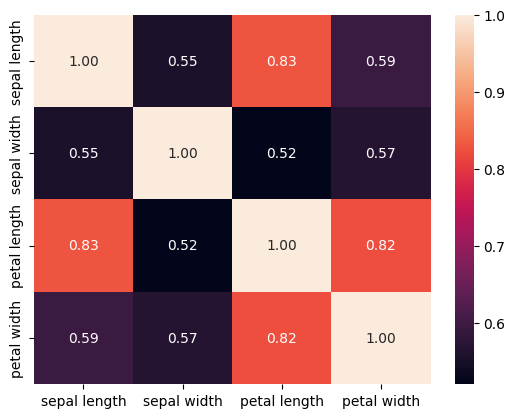

In [4]:
import seaborn as sns
sns.heatmap(X.corr(), annot=True, fmt='.2f')


Vemos que en esta matriz de confucion hay diferentes correlaciones y aplicamos nuevamente el VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



df_with_const = add_constant(X)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

       Variable         VIF
0         const  125.170277
1  sepal length    3.990113
2   sepal width    1.721954
3  petal length    7.252447
4   petal width    3.948354


Eliminar la variable "petal length" ya que es la que tiene el VIF más alto, al hacer esto nos quedamos con variables más importantes

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


VIX = X[['sepal length', 'sepal width', 'petal width']]
df_with_const = add_constant(VIX)

# Calcula el VIF para cada variable predictora
vif_data = pd.DataFrame()  
vif_data["Variable"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)

       Variable         VIF
0         const  122.240203
1  sepal length    1.730834
2   sepal width    1.649553
3   petal width    1.766067


En este caso todas tiene un VIF muy cercano a 1, lo que es perfecto ya que 1 represneta que no existe multicolinealidad (en el rango de 1 a 5)

<Axes: >

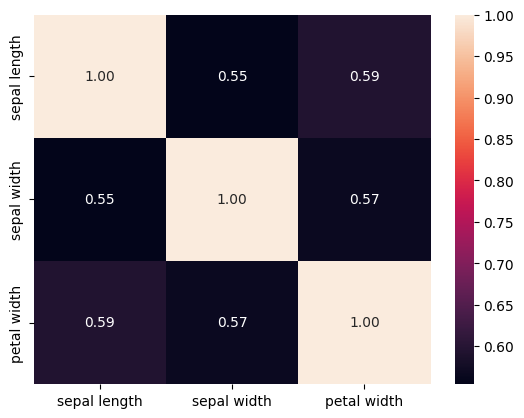

In [7]:
sns.heatmap(VIX.corr(), annot=True, fmt='.2f')

Nos quendamos nuevamente con las variables más importates.

In [8]:
iris_df_filtered = iris_df_filtered.drop(columns = ["petal length"]) # Quito la columna petal length del df

Me quedo con VIX, como la svaribles explicativas, y las etiquetas e iris_df como el data frame

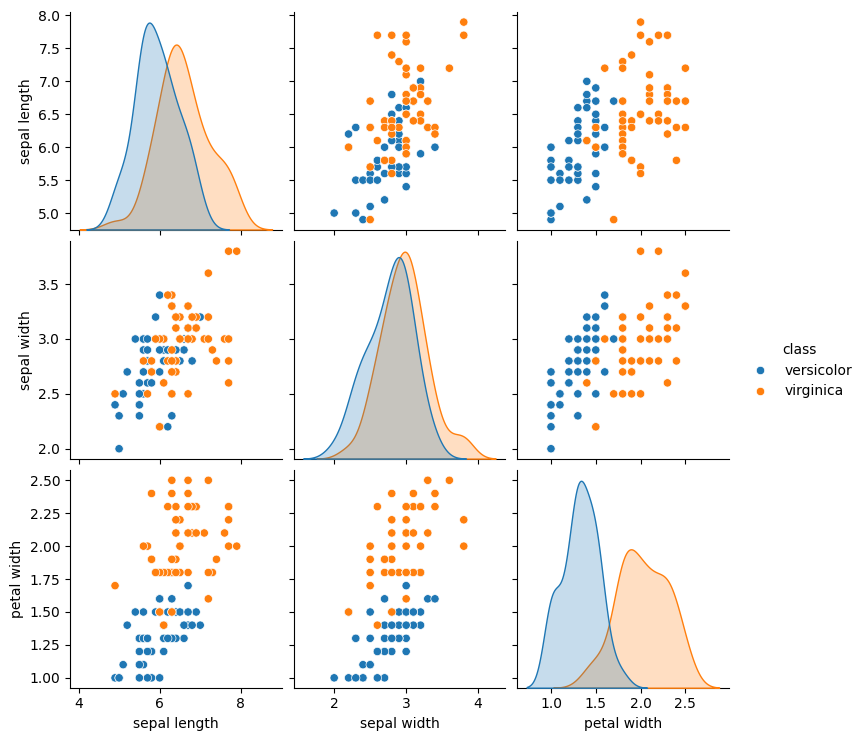

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(iris_df_filtered, hue='class')  
plt.show()

En este caso se ve que los datos estan mucho más juntos y es realmente dificil separalos lienalmente.

## Implementación del modelo

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC

In [11]:
iris_df_filtered.head()

,sepal length,sepal width,petal width,class
50,7.0,3.2,1.4,versicolor
51,6.4,3.2,1.5,versicolor
52,6.9,3.1,1.5,versicolor
53,5.5,2.3,1.3,versicolor
54,6.5,2.8,1.5,versicolor


In [12]:
import plotly.express as px
import pandas as pd

fig = px.scatter_3d(iris_df_filtered, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')


# Mostrar el gráfico
fig.show()

Y aun graficando 3D se ven los datos muy pegado.

In [13]:
import plotly.express as px
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly.graph_objs as go


# Codificamos las etiquetas de clase
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(iris_df_filtered['class'])

# Entrenamos el clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear')
clf.fit(iris_df_filtered[['sepal length', 'sepal width', 'petal width']], y_encoded)

# Coeficientes del hiperplano
w = clf.coef_[0]
v = clf.intercept_

# Creamos un gráfico 3D interactivo usando plotly express
fig = px.scatter_3d(iris_df_filtered, x='sepal length', y='sepal width', z='petal width',
                    color='class', symbol='class')

# Creamos la malla para el hiperplano
xx, yy = np.meshgrid(np.linspace(iris_df_filtered['sepal length'].min(), iris_df_filtered['sepal length'].max(), 50),
                     np.linspace(iris_df_filtered['sepal width'].min(), iris_df_filtered['sepal width'].max(), 50))
zz = (-w[0] * xx - w[1] * yy - v) / w[2]

# Añadimos el hiperplano al gráfico
fig.add_traces(go.Surface(x=xx, y=yy, z=zz, name='SVM Hyperplane', opacity=0.5, showscale=False))

# Mostrar el gráfico
fig.show()

Y podemos ver como aun con todos los datos hiperplano dado por SVM comote muchos errores.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris_df = iris_df_filtered.sample(frac=1).reset_index(drop=True)

# Separa las clases
versicolor = iris_df[iris_df['class'] == 'versicolor']
virginica = iris_df[iris_df['class'] == 'virginica']

# Selecciona 5 muestras aleatorias de cada clase para el conjunto de prueba
versicolor_test = versicolor.sample(5)
virginica_test = virginica.sample(5)

# Concatena las muestras de prueba en un único DataFrame
test_df = pd.concat([versicolor_test, virginica_test])

# Elimina las muestras de prueba del DataFrame original para obtener el conjunto de entrenamiento
train_df = iris_df.drop(test_df.index)

# Ahora tienes tus conjuntos de entrenamiento y prueba
print("Conjunto de Entrenamiento:")
print(train_df)
print("\nConjunto de Prueba:")
print(test_df)

# características y las etiquetas por separado:
X_train = train_df[['sepal length', 'sepal width', 'petal width']]
y_train = train_df['class']
X_test = test_df[['sepal length', 'sepal width', 'petal width']]
y_test = test_df['class']

Conjunto de Entrenamiento:
    sepal length  sepal width  petal width       class
1            7.1          3.0          2.1   virginica
2            6.5          3.2          2.0   virginica
3            6.1          2.8          1.2  versicolor
4            6.0          3.0          1.8   virginica
5            6.5          2.8          1.5  versicolor
..           ...          ...          ...         ...
94           6.2          3.4          2.3   virginica
95           6.8          2.8          1.4  versicolor
97           6.3          3.3          1.6  versicolor
98           7.7          3.0          2.3   virginica
99           6.0          2.2          1.5   virginica

[90 rows x 4 columns]

Conjunto de Prueba:
    sepal length  sepal width  petal width       class
96           5.8          2.7          1.0  versicolor
58           6.1          3.0          1.4  versicolor
10           5.5          2.5          1.3  versicolor
0            5.7          2.6          1.0  versi

Separo los datos en entrenamiento y testeo para escalarlos.

## Preprocesamiento

In [15]:
X_train.shape

min_on_training = X_train.min(axis=0)
min_on_training.shape

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

X_train_scaled = (X_train - min_on_training) / range_on_training

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))

print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
sepal length    0.0
sepal width     0.0
petal width     0.0
dtype: float64
Maximum for each feature
 sepal length    1.0
sepal width     1.0
petal width     1.0
dtype: float64


In [16]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [17]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.900


Entrenamos un modelo con los parametros por defecto y vemos que su puntaje Accuracy (datos bien clasificados / todos los datos)

In [18]:
svc_C01 = SVC(C=.001)
svc_C01.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc_C01.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_C01.score(X_test_scaled, y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.900


Provando con un $C$ diferente vemos como empeora, ahora veremos unos graficos que los mostratan de mejor forma.

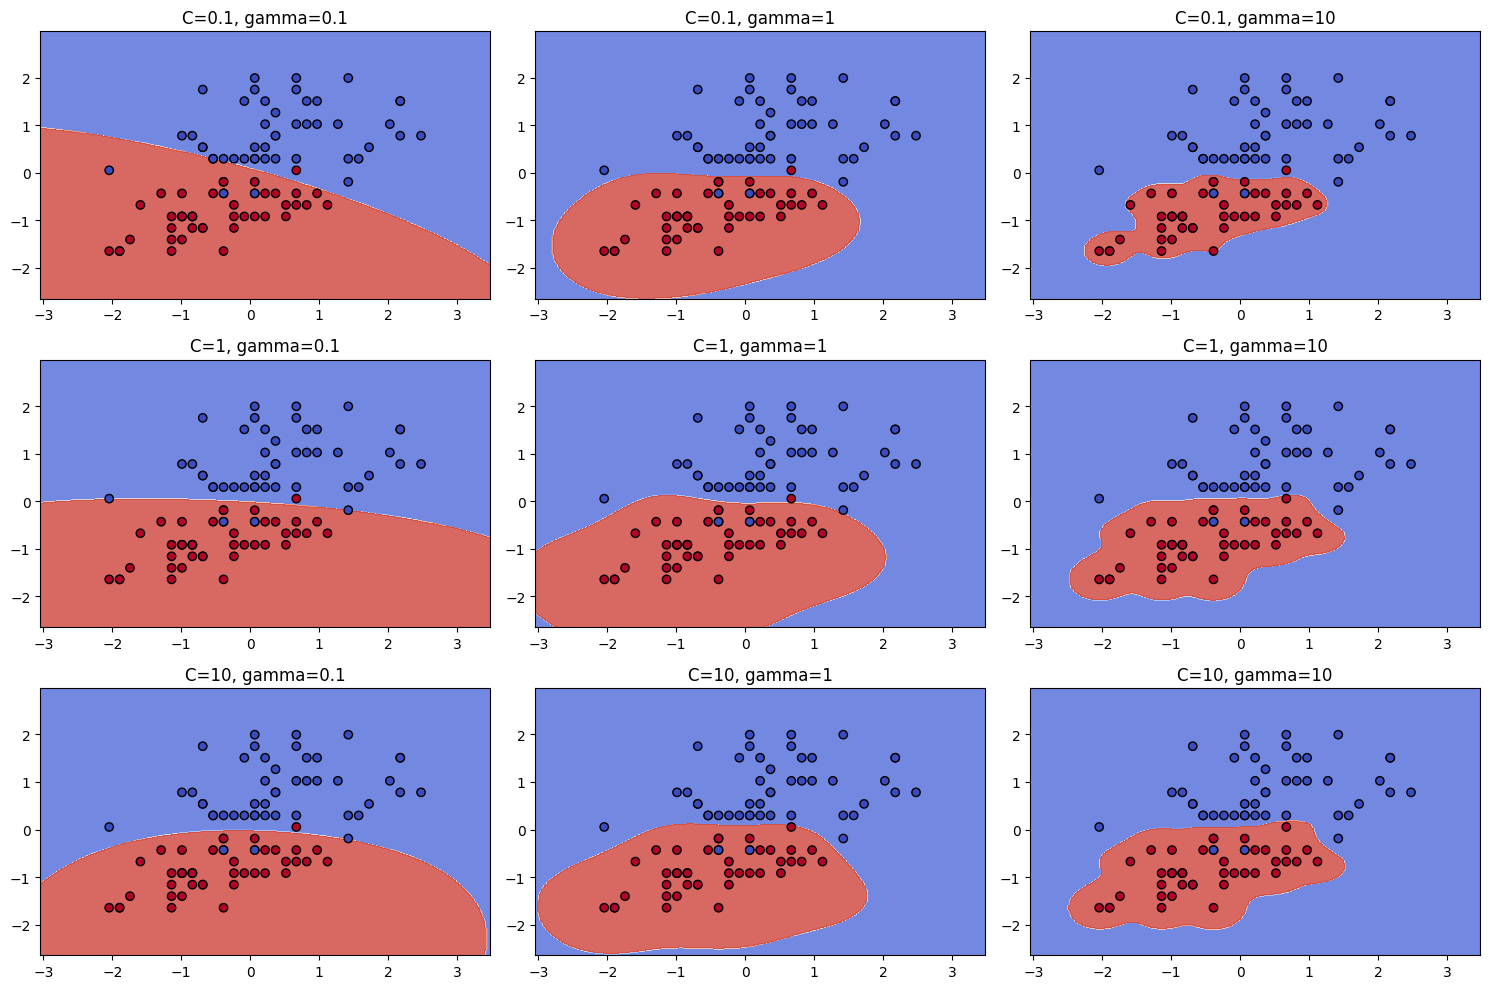

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


features = ['sepal length', 'petal width']  # características que deseas usar
X_train = train_df[features].values
y_train = train_df['class'].map({'virginica': 0, 'versicolor': 1}).values  # Codifica las clases a valores numéricos

# Escala las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Valores de C y gamma para probar, en escala logarítmica
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# Crear subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        ax = axes[i, j]
        # Entrena el modelo SVM
        svc = SVC(C=C, gamma=gamma)
        svc.fit(X_train_scaled, y_train)

        # Crea una malla de puntos para dibujar la frontera de decisión
        h = .02  # Tamaño del paso en la malla
        x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
        y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predice las etiquetas para cada punto en la malla y redimensiona para el gráfico
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Dibuja la frontera de decisión y los puntos de datos
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        ax.set_title(f'C={C}, gamma={gamma}')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Aqui se entreno otro modelo, con solo dos caracteristicas para asi poder graficar como cambia el funcionamiento con los diferentes parametros

Entrnado el SVM con diferentes hiperparametros vemos como cada uno obtiene diferestes resultados y devemos escoger el que tenga mejores resultados para poder predecir.

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


iris_df = iris_df_filtered.sample(frac=1).reset_index(drop=True)

# Separa las clases
versicolor = iris_df[iris_df['class'] == 'versicolor']
virginica = iris_df[iris_df['class'] == 'virginica']

# Selecciona 5 muestras aleatorias de cada clase para el conjunto de prueba
versicolor_test = versicolor.sample(15)
virginica_test = virginica.sample(15)

# Concatena las muestras de prueba en un único DataFrame
test_df = pd.concat([versicolor_test, virginica_test])

# Elimina las muestras de prueba del DataFrame original para obtener el conjunto de entrenamiento
train_df = iris_df.drop(test_df.index)

# conjuntos de entrenamiento y prueba
#print("Conjunto de Entrenamiento:")
#print(train_df)
#print("\nConjunto de Prueba:")
#print(test_df)


X_train = train_df[['sepal length', 'sepal width', 'petal width']]
y_train = train_df['class']
X_test = test_df[['sepal length', 'sepal width', 'petal width']]
y_test = test_df['class']

In [95]:
X_train.shape

min_on_training = X_train.min(axis=0)
min_on_training.shape

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training.shape

X_train_scaled = (X_train - min_on_training) / range_on_training

X_test_scaled = (X_test - min_on_training) / range_on_training


y_train = np.where(y_train == 'virginica', -1, 1)

y_test_encoded = np.where(y_test == 'virginica', -1, 1)

## Implementacion

Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0
F1 Score: 0.9090909090909091


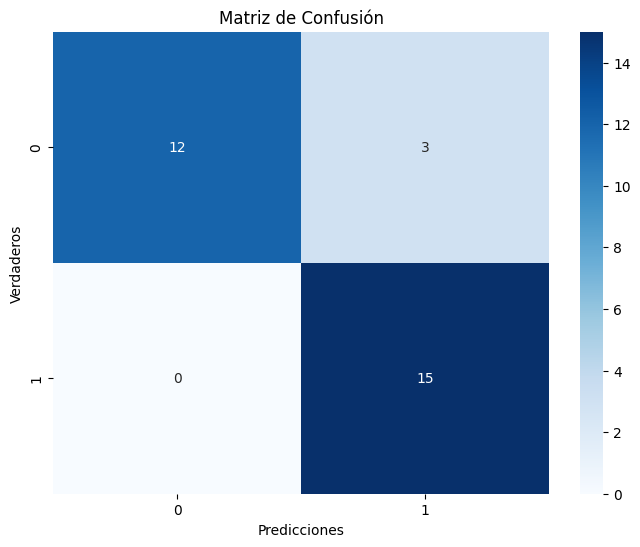

In [96]:
import numpy as np
from cvxopt import matrix, solvers

def train_svm(X_train, y_train, C=1.0):
    # Se obtienen el número de muestras y características de los datos de entrenamiento
    n_samples, n_features = X_train.shape

    # Se calcula el producto punto entre cada par de puntos de datos (Kernel Lineal)
    K = np.dot(X_train, X_train.T)

    # Se crea la matriz P del problema de optimización cuadrática
    P = matrix(np.outer(y_train, y_train) * K)

    # Se crea el vector q del problema de optimización cuadrática
    q = matrix(-np.ones((n_samples, 1)))

    # Se crean las matrices G y h para las restricciones de los multiplicadores de Lagrange
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    
    # Se crea la matriz A y el vector b para la restricción que las sumas de los multiplicadores sean 0
    A = matrix(y_train, (1, n_samples), 'd')
    b = matrix(0.0)

    # Se deshabilita la salida de progreso del solucionador
    solvers.options['show_progress'] = False

    # Se resuelve el problema de programación cuadrática
    solution = solvers.qp(P, q, G, h, A, b)

    # Se extraen los multiplicadores de Lagrange de la solución
    lambdas = np.array(solution['x']).flatten()

    # Se identifican los vectores de soporte (aquellos con lambda no cero)
    support_vectors = lambdas > 1e-5
    ind = np.arange(len(lambdas))[support_vectors]
    lambdas = lambdas[support_vectors]
    sv = X_train[support_vectors]
    sv_y = y_train[support_vectors]

    # Se calcula el término de sesgo 'b'
    b = np.mean([y_k - np.sum(lambdas * sv_y * K[ind_k, support_vectors])
                 for ind_k, y_k in zip(ind, sv_y)])
    # Se devuelve la solución: multiplicadores, vectores de soporte, etiquetas y sesgo
    return lambdas, sv, sv_y, b


# Se utiliza la función de predicción para calcular la clasificación de los nuevos puntos
def svm_predict(X, lambdas, sv, sv_y, b):
    return np.sign(np.sum(lambdas * sv_y * np.dot(X, sv.T), axis=1) + b)


C_value = 1000  # c
lambdas, sv, sv_y, b = train_svm(X_train_scaled, y_train, C=C_value)
y_test_predicted = svm_predict(X_test_scaled, lambdas, sv, sv_y, b)



import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = y_test_predicted


# Calculamos la matriz de confusión y mostramos los errores
conf_mat = confusion_matrix(y_test_encoded, y_pred)

# Calculamos los errores
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)


# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualizamos la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()


#  predicho/real
if X_test_scaled.shape[1] == 2:
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_encoded, cmap='viridis', marker='o', label='Real')
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicho')
    plt.legend()
    plt.show()

Función train_svm:
Preparación de la Matriz del Kernel (Kernel Lineal):

Se calcula el producto punto (también conocido como producto interno o kernel lineal) entre cada par de puntos en los datos de entrenamiento. Esto efectivamente transforma los datos en un espacio donde las clases pueden ser separadas por un hiperplano, incluso si no son linealmente separables en el espacio de entrada original.
Construcción de la Matriz P:

P es una matriz que contiene el producto de los labels (y_train) y el kernel de los datos. Es parte esencial del problema de programación cuadrática y representa la parte que queremos minimizar.
Vector q:

El vector q es una matriz columna de unos negativos. Esto corresponde a la parte lineal de la función objetivo del problema de optimización cuadrática.
Matrices G y h (Restricciones de desigualdad):

Las matrices G y h representan las restricciones de desigualdad para los multiplicadores de Lagrange, asegurando que estos estén entre 0 y el valor de la constante de regularización C. La constante C controla el trade-off entre el margen de la decisión y la clasificación errónea de los puntos de entrenamiento.
Matriz A y Vector b (Restricciones de igualdad):

La matriz A y el vector b representan la restricción de igualdad que asegura que la suma ponderada de los multiplicadores de Lagrange por sus respectivos labels sea igual a cero.
Solución del Problema de Programación Cuadrática:

Se utiliza la función solvers.qp de la biblioteca cvxopt para resolver el problema de optimización cuadrática y encontrar los multiplicadores de Lagrange óptimos.
Extracción de Vectores de Soporte:

Los multiplicadores de Lagrange que son mayores que un umbral pequeño se consideran para los vectores de soporte. Estos son los puntos de datos que influirán en la posición del hiperplano de decisión.
Cálculo del Término de Sesgo b:

El término de sesgo b se calcula como el promedio de los biases obtenidos de los vectores de soporte.

nos resultados del Kernel lineal con c = 1000 son buenos pero sigue comnetiendo algunos errores

Accuracy: 0.9666666666666667
Precision: 1.0
Recall: 0.9333333333333333
F1 Score: 0.9655172413793104


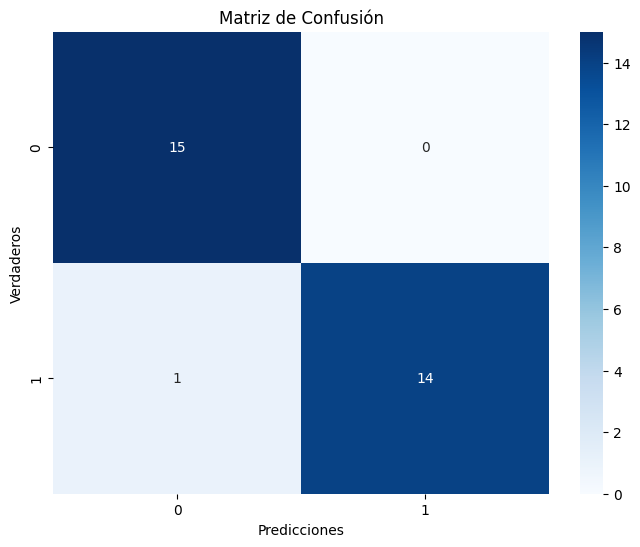

In [92]:
import numpy as np
from cvxopt import matrix, solvers

def train_svm_poly(X_train, y_train, C=1.0, degree=5, coef0=2):
    n_samples = X_train.shape[0]
    K_poly = (np.dot(X_train, X_train.T) + coef0) ** degree
    P = matrix(np.outer(y_train, y_train) * K_poly)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y_train.reshape(1, -1), (1, n_samples), 'd')
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)
    lambdas = np.array(solution['x']).flatten()
    support_vectors = lambdas > 1e-5
    ind = np.arange(len(lambdas))[support_vectors]
    lambdas = lambdas[support_vectors]
    sv = X_train[support_vectors]
    sv_y = y_train[support_vectors]
    b = np.mean([y_k - np.sum(lambdas * sv_y * K_poly[ind_k, support_vectors])
                 for ind_k, y_k in zip(ind, sv_y)])
    return lambdas, sv, sv_y, b

def svm_predict_poly(X, lambdas, sv, sv_y, b, degree=5, coef0=2):
    K_poly_pred = (np.dot(X, sv.T) + coef0) ** degree
    return np.sign(np.sum(lambdas * sv_y * K_poly_pred, axis=1) + b)


C_value = 0.01  # c
lambdas, sv, sv_y, b = train_svm_poly(X_train_scaled, y_train, C=C_value, degree=5, coef0=2)
y_test_predicted = svm_predict_poly(X_test_scaled, lambdas, sv, sv_y, b, degree=5, coef0=2)



import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = y_test_predicted


# Calculamos la matriz de confusión y mostramos los errores
conf_mat = confusion_matrix(y_test_encoded, y_pred)

# Calculamos los errores
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)


# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualizamos la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()


# predicho/real
if X_test_scaled.shape[1] == 2:
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_encoded, cmap='viridis', marker='o', label='Real')
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicho')
    plt.legend()
    plt.show()



Calcula el kernel polinómico para cada par de muestras en X_train utilizando el grado especificado degree y el término independiente coef0. Esto permite representar interacciones no lineales entre las características.

en este caso con un Kernel polinomico y un C: 0,01 clasifica mejor las etiquetas, teniendo aun una posible mejora.

Accuracy: 0.9
Precision: 1.0
Recall: 0.8
F1 Score: 0.888888888888889


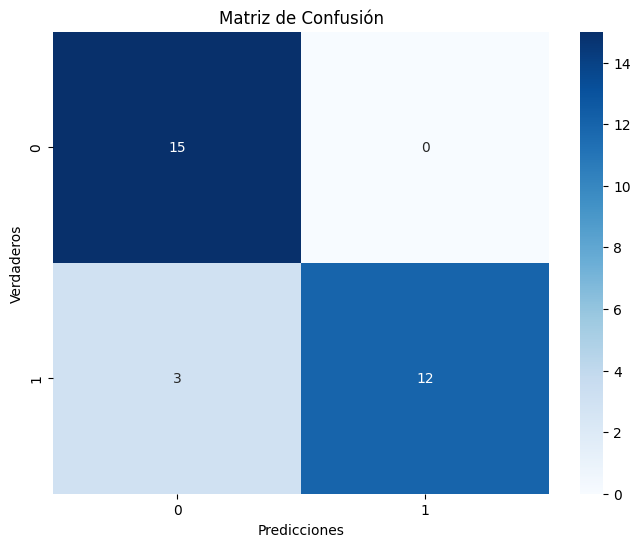

In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
from cvxopt import matrix, solvers
import pandas as pd

def train_svm_rbf(X_train, y_train, C=1.0, gamma=0.1):
    n_samples = X_train.shape[0]
    K_rbf = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            diff = X_train.iloc[i] - X_train.iloc[j]
            K_rbf[i, j] = np.exp(-gamma * np.linalg.norm(diff) ** 2)
    P = matrix(np.outer(y_train, y_train) * K_rbf)
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y_train.reshape(1, -1), (1, n_samples), 'd')
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)
    lambdas = np.array(solution['x']).flatten()
    support_vectors = lambdas > 1e-5
    ind = np.arange(len(lambdas))[support_vectors]
    lambdas = lambdas[support_vectors]
    sv = X_train.iloc[support_vectors].to_numpy()
    sv_y = y_train[support_vectors]
    b = np.mean([y_k - np.sum(lambdas * sv_y * K_rbf[ind_k, support_vectors])
                 for ind_k, y_k in zip(ind, sv_y)])
    return lambdas, sv, sv_y, b

def svm_predict_rbf(X, lambdas, sv, sv_y, b, gamma=0.1):
    X = np.asarray(X)  
    K_rbf_pred = np.zeros((X.shape[0], sv.shape[0]))
    for i in range(X.shape[0]):
        for j in range(sv.shape[0]):
            K_rbf_pred[i, j] = np.exp(-gamma * np.linalg.norm(X[i] - sv[j]) ** 2)
    return np.sign(np.sum(lambdas * sv_y * K_rbf_pred, axis=1) + b)



C_value = 100  # C
gamma_value = 100  # Gamma
lambdas, sv, sv_y, b = train_svm_rbf(X_train_scaled, y_train, C=C_value, gamma=gamma_value)
y_test_predicted = svm_predict_rbf(X_test_scaled, lambdas, sv, sv_y, b, gamma=gamma_value)




y_pred = y_test_predicted


# Calculamos la matriz de confusión y mostramos los errores
conf_mat = confusion_matrix(y_test_encoded, y_pred)

# Calculamos los errores
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)


# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualizamos la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

# predicho/real
if X_test_scaled.shape[1] == 2:
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_encoded, cmap='viridis', marker='o', label='Real')
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predicho')
    plt.legend()
    plt.show()


Matriz del kernel RBF: La matriz resultante (K_rbf) es una matriz simétrica n_samples x n_samples donde cada elemento i, j representa la similitud (calculada por el kernel RBF) entre la muestra i y la muestra j. Esta matriz es una representación de los datos de entrenamiento en el espacio de características transformado por el kernel RBF.

en este caso usamos un kernel RBF con C_value = 100 gamma_value = 100 como parametros, los cuales son muy grandes y termina causando pequeños errores.

Repitiendo el proceso con valos de C entre 0.1 y 1 todos los clasificadorrres hicieorn predicciones perfectas.

## Conclusión

En este caso podemos ver que aunque probemos diferentes kerners y los valores de c y gamma no son óptimos el SVM indeoendiemntemente del kernel, cometerá errores aun asi tiene un desempeño bastante alto por lo que escogiendo unos hiperparámetros mejores logra clasificar de forma correcta todas las etiquetas.